In [2]:
# Import libraries
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [3]:
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

In [4]:
# determine the number of input features
n_features = X.shape[1]

In [5]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

In [7]:
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

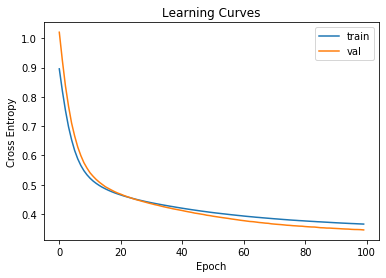

In [8]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [9]:
# save model to file
model.save('model.h5')

In [10]:
from tensorflow.keras.models import load_model
# load the model from file
model = load_model('model.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


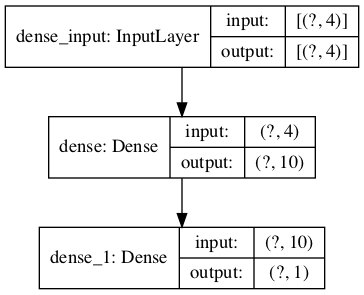

In [12]:
from tensorflow.keras.utils import plot_model
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

In [13]:
# make a Prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.876


In [14]:
# using Dropout
from tensorflow.keras.layers import Dropout
# define model
model.add(Dropout(0.5))

In [15]:
# accelerate training with Batch Normalization
from tensorflow.keras.layers import BatchNormalization
# define model
model.add(BatchNormalization())

In [16]:
# halt training with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[es])

In [19]:
# evaluate the model
from numpy import sqrt
error = model.evaluate(X, y, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 2.785, RMSE: 1.669


In [20]:
# make a Prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.134


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


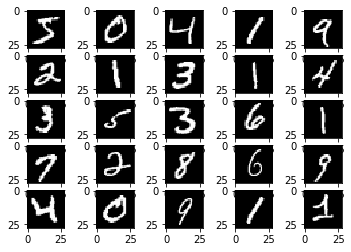

In [21]:
# Develop Convolutional Neural Network Models
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()